<a href="https://colab.research.google.com/github/nguyenphucloc22/test/blob/main/W4_27_2_23_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=b7b6788a33773657f20ed613e209c2b045b14b759b32a9d49ac67a9e39e939c7
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

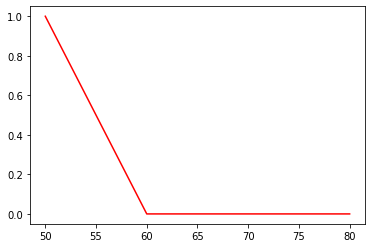

In [6]:
x = np.arange(50,81,1)
slow = fuzz.trimf(x, [50,50,60])
medium = fuzz.trimf(x,[50,60,70])
medium_fast = fuzz.trimf(x,[60,70,80])
full_speed = fuzz.trimf(x,[70,80,80])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')


In [7]:
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['avg']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])

service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['avg']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])

tip['less']=fuzz.trimf(tip.universe,[10,10,15])
tip['avg']=fuzz.trimf(tip.universe,[10,15,30])
tip['much'] = fuzz.trimf(tip.universe,[15,30,30])

18.360824742268044


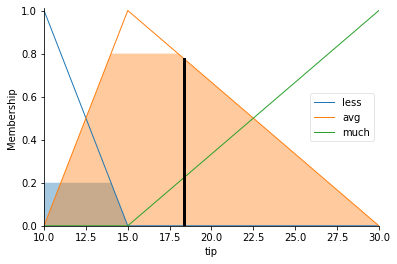

In [9]:
rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor']&service['avg'],tip['less'])
rule3 = ctrl.Rule(food['poor']&service['good'],tip['less'])
rule4 = ctrl.Rule(food['avg']&service['poor'],tip['less'])
rule5 = ctrl.Rule(food['avg']&service['avg'],tip['avg'])
rule6 = ctrl.Rule(food['avg']&service['good'],tip['avg'])
rule7 = ctrl.Rule(food['good']&service['poor'],tip['less'])
rule8 = ctrl.Rule(food['good']&service['avg'],tip['avg'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['much'])

tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']= 9.5
tipping.input['service']=4
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

In [26]:

time = ctrl.Antecedent(np.arange(10,301,1),'time')
rice = ctrl.Antecedent(np.arange(100,2001,1),'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power')

time['very_fast']=fuzz.trimf(time.universe,[10,10,17])
time['fast']=fuzz.trimf(time.universe,[10,17,45])
time['med']=fuzz.trimf(time.universe,[17,45,100])
time['slow']=fuzz.trimf(time.universe,[100,180,300])
time['very_slow']=fuzz.trimf(time.universe,[180,300,300])

rice['very_less']=fuzz.trimf(rice.universe,[100,100,700])
rice['less']=fuzz.trimf(rice.universe,[100,700,1000])
rice['med']=fuzz.trimf(rice.universe,[700,1000,1800])
rice['much']=fuzz.trimf(rice.universe,[1000,1800,1900])
rice['very_much']=fuzz.trimf(rice.universe,[1800,1900,2000])

power['very_low']=fuzz.trimf(power.universe,[0,0,15])
power['low']=fuzz.trimf(power.universe,[0,15,35])
power['med']=fuzz.trimf(power.universe,[15,35,60])
power['high']=fuzz.trimf(power.universe,[35,60,90])
power['very_high']=fuzz.trimf(power.universe,[90,100,100])


61.67735042735044


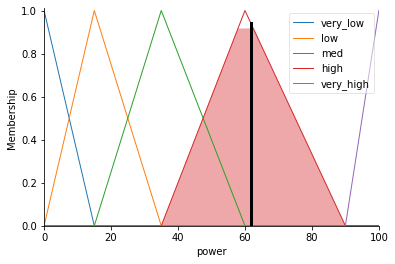

In [31]:
rule1 = ctrl.Rule(time['very_fast']&rice['very_less'],power['very_low'])
rule2 = ctrl.Rule(time['very_fast']&rice['less'],power['low'])
rule3 = ctrl.Rule(time['very_fast']&rice['med'],power['med'])
rule4 = ctrl.Rule(time['very_fast']&rice['much'],power['high'])
rule5 = ctrl.Rule(time['very_fast']&rice['very_much'],power['very_high'])
rule6 = ctrl.Rule(time['fast']&rice['very_less'],power['very_low'])
rule7 = ctrl.Rule(time['fast']&rice['less'],power['low'])
rule8 = ctrl.Rule(time['fast']&rice['med'],power['med'])
rule9 = ctrl.Rule(time['fast']&rice['much'],power['high'])
rule10 = ctrl.Rule(time['fast']&rice['very_much'],power['very_high'])
rule11 = ctrl.Rule(time['med']&rice['very_less'],power['low'])
rule12 = ctrl.Rule(time['med']&rice['less'],power['low'])
rule13 = ctrl.Rule(time['med']&rice['med'],power['med'])
rule14 = ctrl.Rule(time['med']&rice['much'],power['high'])
rule15 = ctrl.Rule(time['med']&rice['very_much'],power['very_high'])
rule16 = ctrl.Rule(time['slow']&rice['very_less'],power['low'])
rule17 = ctrl.Rule(time['slow']&rice['less'],power['low'])
rule18 = ctrl.Rule(time['slow']&rice['med'],power['med'])
rule19 = ctrl.Rule(time['slow']&rice['much'],power['high'])
rule20 = ctrl.Rule(time['slow']&rice['very_much'],power['high'])
rule21 = ctrl.Rule(time['very_slow']&rice['very_less'],power['very_low'])
rule22 = ctrl.Rule(time['very_slow']&rice['less'],power['low'])
rule23 = ctrl.Rule(time['very_slow']&rice['med'],power['med'])
rule24 = ctrl.Rule(time['very_slow']&rice['much'],power['high'])
rule25 = ctrl.Rule(time['very_slow']&rice['very_much'],power['high'])
P_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
P = ctrl.ControlSystemSimulation(P_ctrl)
P.input['time']=290
P.input['rice']=1900
P.compute()
print(P.output['power'])
power.view(sim=P)